<h1><center>Approximating the Earth Mover's Distance</center></h1>

**Authors** : Ryan Boustany, Emma Sarfati  
ENSAE 3rd year  
$\texttt{ryan.boustany@ensae.fr}$ ⎜ $\texttt{emma.sarfati@ensae.fr}$

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-1.1">Preamble</a></span><ul class="toc-item"><li><span><a href="#A-gentle-reminder-on-the-Optimal-Transport-problem" data-toc-modified-id="A-gentle-reminder-on-the-Optimal-Transport-problem-1.1.1">A gentle reminder on the Optimal Transport problem</a></span></li><li><span><a href="#The-link-with-the-article" data-toc-modified-id="The-link-with-the-article-1.1.2">The link with the article</a></span></li></ul></li><li><span><a href="#Motivation-and-problematic" data-toc-modified-id="Motivation-and-problematic-1.2">Motivation and problematic</a></span></li><li><span><a href="#Possible-applications" data-toc-modified-id="Possible-applications-1.3">Possible applications</a></span></li></ul></li><li><span><a href="#I---Mathematical-framework" data-toc-modified-id="I---Mathematical-framework-2">I - Mathematical framework</a></span><ul class="toc-item"><li><span><a href="#Notations" data-toc-modified-id="Notations-2.1">Notations</a></span></li><li><span><a href="#Mathematical-results" data-toc-modified-id="Mathematical-results-2.2">Mathematical results</a></span></li></ul></li><li><span><a href="#II---Algorithms" data-toc-modified-id="II---Algorithms-3">II - Algorithms</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Our-code" data-toc-modified-id="Our-code-3.0.1">Our code</a></span></li></ul></li></ul></li><li><span><a href="#III---Simulation-studies" data-toc-modified-id="III---Simulation-studies-4">III - Simulation studies</a></span><ul class="toc-item"><li><span><a href="#EMD-$L_1$-algorithm" data-toc-modified-id="EMD-$L_1$-algorithm-4.1">EMD $L_1$ algorithm</a></span></li><li><span><a href="#EMD-$L_2$-algorithm" data-toc-modified-id="EMD-$L_2$-algorithm-4.2">EMD $L_2$ algorithm</a></span></li></ul></li><li><span><a href="#IV---Discussion-and-Extensions" data-toc-modified-id="IV---Discussion-and-Extensions-5">IV - Discussion and Extensions</a></span><ul class="toc-item"><li><span><a href="#Multilevel-Optimal-Transport-:-an-evolution" data-toc-modified-id="Multilevel-Optimal-Transport-:-an-evolution-5.1">Multilevel Optimal Transport : an evolution</a></span><ul class="toc-item"><li><span><a href="#Interpolation-of-potentials-$\phi_{h}$" data-toc-modified-id="Interpolation-of-potentials-$\phi_{h}$-5.1.1">Interpolation of potentials $\phi_{h}$</a></span></li><li><span><a href="#Interpolation-of-flux-$m_{h}$" data-toc-modified-id="Interpolation-of-flux-$m_{h}$-5.1.2">Interpolation of flux $m_{h}$</a></span></li><li><span><a href="#Algorithm-1M-Multilevel-version-of-Algorithm" data-toc-modified-id="Algorithm-1M-Multilevel-version-of-Algorithm-5.1.3">Algorithm 1M Multilevel version of Algorithm</a></span></li></ul></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-6">References</a></span></li></ul></div>

<img src="mongemap.png" width=900px>

<h1><center>Abstract</center></h1>

In this Notebook we propose a detailed study and an implementation of the article of Wuchen Li, Stanley Osher and Wilfrid Gangbo : *A fast algorithm for Earth Mover's Distance based on Optimal Transport and $L_1$ type regularization*. The idea is to propose a smart implementation of optimization algorithms based on a reformulation of the Earth Mover's Distance that is efficient for computations. Our work is mainly based on the updated version of the paper that was published in the Journal of Scientific Computing in 2018 : *A parallel method for Earth Mover's Distance*, due to the better notations that were proposed.

## Introduction

### Preamble

Optimal Transport has become a trendy domain in the field of statistical research. It has enjoyed a growing litterature since a few years (**[1]**,**[2]**), and seen two recent Fields medal prizes attached to its interest (Villani 2008, Figalli 2018). First, the domain itself presents a very interesting theoretical framework as it is at the outcome of statistics, algebra, computations and even physics. Second, the possible practical applications of this theory are multiple, and the discipline sometimes allows to achieve remarkable results in popular fields as image processing or machine learning (**[3]**). Third, the motivations of Optimal Transport are very intuitive and are based on historical problems of soldiers movements or stock flux. 
The paper aims at resolving one of those problems by carrying out a discretization of the transport plan, and using a "classical" optimization procedure thanks to a dynamical reformulation of the Optimal Transport Kantorovich problem, also called the Wasserstein Distance.

#### A gentle reminder on the Optimal Transport problem

First, we recall a few important notions of optimal transport main notations and goals.  
Let $\mu$ and $\nu$ in $\mathcal{P}(\Omega)$, $\Omega$ is a measurable space and $\mathcal{P}(\Omega)$ the space of probability measures on the geometric space $\Omega$, that is $\displaystyle \mathcal{P}(\Omega)=\{\rho(x)\in L^1(\Omega) : \int_\Omega\rho(x)\mathrm{d}x=1, \rho(x)\ge 0\}$. The Monge Problem was the first optimal transport to be formulated, in the $XVIII^{th}$ century and it aimed to compute an economic way to move soil between to places to make embankments. 

$$\underline{\text{Monge Problem}} : \inf_{T\#\mu=\nu}\int_\Omega c(x,T(x))\mu(\mathrm{d}x)$$

where $T\#\mu$ corresponds to the image measure : $T\#\mu:=\mu(T^{-1}(B)) \,\, \forall B\in\Omega$, $c:\Omega\times\Omega\rightarrow\mathbb{R}$ is the cost function.

<img src='monge.png' width=800px>

The Soviet mathematician and economist Leonid Kantorovich made progress in this field during World War II, after A.N.Tolstoï formulated the problem for the first time **[7]** in the collection Transportation Planning Volume I for the National Commissariat of Transportation of the Soviet Union.

$$\underline{\text{Kantorovich Problem}} : \inf_{P\in\Pi(\mu,\nu)}\int\int_{\Omega\times\Omega}c(x,y)P(x,y)\mathrm{d}x\mathrm{d}y$$

where $\Pi(\mu,\nu)$ is the space of **couplings** : $\Pi(\mu,\nu)=\{P\in\mathcal{P}(\Omega,\Omega) : \forall A, B\subset\Omega,P(A\times \Omega)=\mu(A) \,and\, P(\Omega\times B)=\nu(B)\}$

<img src="kanto.png" width=800px>

#### The link with the article

The main research on Optimal Transport today focuses on efficient algorithms to compute the solution of the Kantorovich optimization problem in different settings (**[4]**, **[5]**), such as for particular distance metrics, special probability spaces or environment conditions (images, signal...). This solution is also known as the Wasserstein distance, or the **Earth Mover's Distance**. It is formulated as follow : 

$$\operatorname{EMD}\left(\rho^{0}, \rho^{1}\right)=\left(\begin{array}{ll}\operatorname{minimize} & \int_{\Omega \times \Omega} c\left(\mathbf{x}_{1}, \mathbf{x}_{2}\right) \pi\left(\mathbf{x}_{1}, \mathbf{x}_{2}\right) d \mathbf{x}_{1} d \mathbf{x}_{2} \\ \text { subject to } & \int_{\Omega} \pi\left(\mathbf{x}_{1}, \mathbf{x}_{2}\right) d \mathbf{x}_{2}=\rho^{0}\left(\mathbf{x}_{1}\right) \\ & \int_{\Omega} \pi\left(\mathbf{x}_{1}, \mathbf{x}_{2}\right) d \mathbf{x}_{1}=\rho^{1}\left(\mathbf{x}_{2}\right)\end{array}\right)\,\,\,\,(1)$$

where $\pi\geq 0$, a joint measure (the transport plan) on $\Omega\times\Omega$, is the **optimization variable**. The distance function $c$ is the ground metric, and is commonly chosen as the $L_1$ or $L_2$ norm, namely $c\left(\mathbf{x}_{1}, \mathbf{x}_{2}\right)=\left\|\mathbf{x}_{1}-\mathbf{x}_{2}\right\|_{2}$ or $c\left(\mathbf{x}_{1}, \mathbf{x}_{2}\right)=\left\|\mathbf{x}_{1}-\mathbf{x}_{2}\right\|_{1}$. $\rho^0$ and $\rho^1$ are our inputs and corresponds to the elements that we want to become "close", in the smartest way as possible. For example, it can corresponds to two images we want to morph.
The key of the algorithm proposed by the author resides in an important reformulation of the Monge problem. One can prove that (1) is equivalent to :

$$
\operatorname{EMD}\left(\rho^{0}, \rho^{1}\right)=\left(\begin{array}{ll}\operatorname{minimize} & \int_{\Omega} L(\mathbf{m}(\mathbf{x})) d \mathbf{x} \\ \text { subject to } & \nabla \cdot \mathbf{m}(\mathbf{x})+\rho^{1}(\mathbf{x})-\rho^{0}(\mathbf{x})=0 \\ & \mathbf{m}(\mathbf{x}) \cdot \mathbf{n}(\mathbf{x})=0, \text { for all }\left\{\begin{array}{l}\mathbf{x} \in \partial \Omega \\ \mathbf{n}(\mathbf{x}) \text { normal to } \partial \Omega\end{array}\right.\end{array}\right)\,\,\,\,(2)
$$

where the optimization variable $\mathbf{m}:\Omega\rightarrow\mathbb{R}^d$ is a flux vector satisfying the zero flux boundary condition, and $L$ corresponds to the *ground metric* : $L(\mathbf{v})=\|\mathbf{v}\|_{2}$ or $L(\mathbf{v})=\|\mathbf{v}\|_{1}$.

*Proof* : we won't go into further details here as the proof is entirely available in section 2. of the paper. But it all starts byy writing $c$, the distance function, in a variational form, *i.e.*

$$
c\left(\mathbf{x}_{1}, T\left(\mathbf{x}_{1}\right)\right)=\left(\begin{array}{ll}
\operatorname{minimize} & \int_{0}^{1} L(\mathbf{v}) d t \\
\text { subject to } & \frac{d}{d t} \mathbf{x}=\mathbf{v}, & \mathbf{x}(0)=\mathbf{x}_{1}, \quad \mathbf{x}(1)=T\left(\mathbf{x}_{1}\right)
\end{array}\right)
$$

Some further calculations leads to the reformulation (2).


The goal of the paper is to propose an algorithm that **solves efficiently the EMD**. At this aim, we consider a *discrete* probability space to approximate the continuous one. More precisely, the space in which we consider the probability measures, called $G$ (the "equivalent" of $\Omega$) is a lattice (squared) graphe $G=(V,E)$, with $E$ the edge set and $V$ the vertex set. We recall the definition of the probability space : $\displaystyle \mathcal{P}(\Omega)=\{\rho(x)\in L^1(\Omega) : \int_\Omega\rho(x)\mathrm{d}x=1, \rho(x)\ge 0\}$. In the considered discretization, $\mathcal{P}(G)$ is a discrete probability set defined on the graphe $G$, so by simply retaking the definition presented beforehand, we have $\displaystyle \mathcal{P}(G)=\{(p_i)_{i\in V} : \sum_{i\in V}p_i=1, p_i\ge 0\,\forall i\in V\}$. Moreover, we define each probability measure $p_i$ over a cube $C_i$, which is the same for each point $i$, of length $\Delta x$.  
We can provide an interpretation of this : at each point on the graphe, we have a special mass around this point $-$ here, *around* corresponds to the mass that falls inside the cube $C_i$ $-$, provided by the probability $p_i$ for the corresponding point $i$. We can then define a whole probability measure $(p_i)_{i\in V}$, with $(p_i)_{i\in V}\in\mathcal{P}(G)$. The problem then becomes to solve the Optimal Transport in the discrete approximation of the original continuous space.   
The purpose is to propose an optimal way, in a sense that it minimizes the *cost*, to move from any such probability measure $(p_i)_{i\in V}$, towards another probability measure $(q_i)_{i\in V}$, of course with $(q_i)_{i\in V}\in\mathcal{P}(G)$. Below we present an illustration in the case of a $3\times 3$ lattice graphe, a first probability measure $p$ and a second $q$. They are denoted $\rho^0$ and $\rho^1$ respectively in the below illustration, to be consistent with the paper notation. The arrows point out that we have to *transport* all the blue mass towards the red mass in an optimal way. Finally, the cubes $C_i$ correspond to the black boxes centered around the green points $i\in V$ (the ones with thick lines).

<img src="grapheOT.png" width=800px>

### Motivation and problematic

We recall the definition of the Earth Mover's Distance (=Kantorovich solution=Wasserstein distance) with the paper conventions : 

$$EMD(\rho^0,\rho^1)=\min_{\pi}\int_\Omega d(x,y)\pi(x,y)\mathrm{d}x\mathrm{d}y \hspace{1cm} (1)$$

with $\pi$ be a joint measure such that it has $\rho^0$ and $\rho^1$ as marginals, i.e $\displaystyle\int_\Omega\pi(x,y)dy=\rho^0(x)$ and $\displaystyle\int_\Omega\pi(x,y)dx=\rho^1(y)$.  
Intuitively, the Earth Mover's Distance indicates us the minimal cost in order to move all the mass carried by $\rho^0$ towards $\rho^1$, knowing that the distance between two points $x$ and $y$ in $\Omega$ is measured by the metric $d$, and the movement being under some constraints (the transport function $\pi$ must be inside the couplings space).

**Objective** : compute the Earth Mover's Distance for Optimal Transport on a lattice graphe using a reformulation of the minimization problem (1). This reformulation allows us to no longer see the EMD as a minimization of the overall transport between two probability measures, but a minimization of an overall flux function norm (under a condition on the original probability measures $\rho^0$ and $\rho^1$). This reformulation comes from a variational approach of the original Wasserstein distance (or Monge problem, or EMD) and is used here for efficient computation. 

**Motivation** : the fact that the authors consider a squared grid as the transport plan allow to solve many different problems, for example in image processing ; images are typically considered as grids. In the above illustration, we would have a much more compact representation of the probability measures ; the blue and red dots would represent the pixels of an image, if it is a black and white image for instance. Then, building an efficient algorithm of optimal transport in the discretized case proposed by the authors is well-motivated.

**Problematic** : solve the problem $(2)$ in the discrete case.

### Possible applications

**How is it linked with Compressed Sensing ?**

The $l_1$ and $l_2$ regularized minimization is very similar to problems which have been solved in the fields of compressed sensing, where several fast methods are available. We will see later but (3) can be an L1-type minimization problem, which shares its structure with many problems in compressed sensing and image processing. It is possible to borrow a very fast and simple algorithm used there to solve EMD.

In fact, we will observe that the EMD is an optimization problem, which is very similar to some problems in compressed sensing whose cost functional is convex and whose constraints are linear.

**Image Processing**

One major application of the theory of Optimal Transport is in image processing, including image generation. The Wasserstein GAN **[8]** for instance aims at generating images based on a loss minimization that is expressed as a Wasserstein distance (instead of the classical Kullback-Leiber divergence in Generative Adversarial Networks training). Some variants of this algorithm like CycleGAN exist **[9]**. The paper that we study here is going to be tested on image, hence its application in image processing is straightforward. It can prove utility in image morphing for instance, or also motion estimation on a video.

## I - Mathematical framework

### Notations

$\underline{\textbf{Goal}}$ : solve the problem (1), equivalently to problem (2), meaning we want to compute the optimal transport between two inputs $\rho^0$ and $\rho^1$.
Note that the inputs can be very different things. For instance, it can be images, and the field $\Omega$ that we approximate with $G$ is the continuous representation of pixels.

- For visualization and implementation simplicity, we consider $\Omega\subset\mathbb{R}^2$ with $\Omega$ being a square. We then consider the discretization $G$ of $\Omega$, characterized by $n$ points : 

$$G = \{(x_i,y_j)\,\,\, i,j\in\{1...n\}\}\approx\Omega\subset\mathbb{R}^2$$

Note that $G$ can be simply seen as a $n\times n$ squared grid. **We approximate $\Omega\subset\mathbb{R}^2$ by $\{x_1,...,x_n\}\times\{y_1,...,y_n\}$**.
- $\rho^0$ and $\rho^1$ are the inputs between which we want to compute an optimal transport, that is the EMD. We need to consider a $\textit{discrete}$ version of those probability measures as we want to represent them in the discrete space in order to solve the optimal transport problem. Then, we consider the discretizations of $\rho^0$ and $\rho^1$, with $\rho^0,\rho^1\in\mathbb{R}^{n\times n}$, defined for $(i,j)\in\mathbb{R}^{n\times n}$ :  

$$\rho_{i j}^{0} \approx \int_{C\left(x_{i}, y_{j}\right)} \rho^{0}(x, y) d x d y$$
$$\rho_{i j}^{1} \approx \int_{C\left(x_{i}, y_{j}\right)} \rho^{1}(x, y) d x d y$$

where $\rho^0$ and $\rho^1$ correspond respectively to the measures $p$ and $q$ in the figure above, with $C(x, y)$ be the $\Delta x \times\Delta x$ cube centered at $(x, y),$ i.e.

$$
C(x, y)=\left\{\left(x^{\prime}, y^{\prime}\right) \in \mathbb{R}^{2}|| x^{\prime}-x|\leq \Delta x / 2,| y^{\prime}-y \mid \leq \Delta x / 2\right\}
$$

Note that a "movement" on the $x$-axis is understood as a step along one column, *i.e* a vertical movement. A movement on the $y$-axis corresponds to a step along one row, *i.e* a horizontal movement. It can be confusing but it is actually intuitive as a movement on the $x$-axis for instance means that we modify the $x$ coordinate, which corresponds to a movement on the same column, but we switch of row. A more appropriate way of calling it would be that we handle a movement on the $x$-coordinate (resp. $y$). These motions are measured within each cube $C$ that are centered on the coordinates $(x_1...x_n,y_1...y_n)$ of the grid, where $C$ has a radius of $\Delta/2$ (see figure above). This group of movements will define what we call a flux, that will be designed as $\mathbf{m}$ in the following.

- $\mathbf{m}$ is the optimization variable that goes from $\Omega$ to $\mathbb{R}^2$. As for the probability measures, we need to consider its discretized version, namely an application from $G$ to $\mathbb{R}^2$. Precisely, $\mathbf{m}$ takes a point $(x_i,y_j)$ as input, and outputs a value in $\mathrm{R}^2$ that represents a *flux*, the first coordinate being the movement on the $x$-axis and the second coordinate being the movement on the $y$-axis. In our code, we consider $\mathbf{m}$ as a 3D tensor (or 3D `numpy array` specifically), the first tensor representing the values of $m$ for the $x$-axis, and the second representing the values of $m$ for the $y$-axis. In a more compact way, $\mathbf{m}=(m_x,m_y)$, with  

$$m_{x, i j} \approx \int_{C\left(x_{i}+\Delta x / 2, y_{j}\right)} m_{x}(x, y) d x d y \,\,\text{for} \,\,i=1,...,n-1 \,\,\text{and}\,\, j=1,...,n$$
$$m_{y, i j} \approx \int_{C\left(x_{i}, y_{j}+\Delta x / 2\right)} m_{y}(x, y) d x d y \,\,\text{for} \,\,i=1,...,n \,\,\text{and} \,\,j=1,...,n-1$$

<img src="matrice.png" width=800px>

- Recall that we want to solve the following problem :  

$$
\operatorname{EMD}\left(\rho^{0}, \rho^{1}\right)=\left(\begin{array}{ll}\operatorname{minimize} & \int_{\Omega} L(\mathbf{m}(\mathbf{x})) d \mathbf{x} \\ \text { subject to } & \nabla \cdot \mathbf{m}(\mathbf{x})+\rho^{1}(\mathbf{x})-\rho^{0}(\mathbf{x})=0 \\ & \mathbf{m}(\mathbf{x}) \cdot \mathbf{n}(\mathbf{x})=0, \text { for all }\left\{\begin{array}{l}\mathbf{x} \in \partial \Omega \\ \mathbf{n}(\mathbf{x}) \text { normal to } \partial \Omega\end{array}\right.\end{array}\right)\,\,\,\,(2)
$$  

with $L(\mathbf{v})=\|\mathbf{v}\|_{2}$ or $L(\mathbf{v})=\|\mathbf{v}\|_{1}$. Using the discretization of $\Omega$ with $G$, the integrals are reformulated with sums, and the gradients $\nabla$ must be considered discrete. So now the goal is to propose a discrete formulation of the problem (2).  
1. For the objective function of the minimization part, as we said, the integral becomes a sum. As $G=\left\{x_{1}, \ldots, x_{n}\right\} \times\left\{y_{1}, \ldots, y_{n}\right\}$, this leads to two sums, that is : 

    $$\int_{\Omega} L(\mathbf{m}(\mathbf{x}))\mathrm{d}\mathbf{x} \rightarrow \int_{G} L(\mathbf{m}(\mathbf{x}))\mathrm{d}\mathbf{x}\rightarrow\sum_{i=1}^{n} \sum_{j=1}^{n}L(\mathbf{m}_{ij})$$
     with $\mathbf{m}_{i j}=(m_{x,i j},m_{y,i j})$ being a vector in $\mathbb{R}^2$.
     
    
2. For the constraints, it is necessary to define a discrete gradient operator that is moreover consistent with the zero-flux boundary condition. The authors then define the discrete divergence operator $\operatorname{div}(\mathbf{m})\in\mathrm{R}^{n\times n}$ as :  

$$\operatorname{div}(\mathbf{m})_{i j}=\frac{1}{\Delta x}\left(m_{x, i j}-m_{x,(i-1) j}+m_{y, i j}-m_{y, i(j-1)}\right)$$

for $i, j=1, \ldots, n,$ where $m_{x, 0 j}=m_{x, n j}=0$ for $j=1, \ldots, n$ and $m_{y, i 0}=m_{y, i n}=0$ for $i=1, \ldots, n$. This definition of $\operatorname{div}(\mathbf{m})$ makes the discrete approximation be consistent with the zero-flux boundary condition. This operator allows to replace the gradient of $\mathbf{m}$ and taking into account the boundary constraint at the same time. So we have the following "transformation" : 

$$\nabla\cdot\mathbf{m}\,\,\text{under zero-flux constraint}\rightarrow\operatorname{div}(\mathbf{m})$$

Hence, the problem (2) can be finally reformulated as follow : 

$$
\begin{array}{cl}
\underset{\mathbf{m}}{\operatorname{minimize}} & \sum_{i=1}^{n} \sum_{j=1}^{n}L(\mathbf{m}_{ij}) \,\,\,\,\,\,\,\, (3) \\  
\text { subject to } & \operatorname{div}(\mathbf{m})+\rho^{1}-\rho^{0}=0
\end{array}
$$

We write $\sum_{i=1}^{n} \sum_{j=1}^{n}L(\mathbf{m}_{ij})$ as the norm $\|\mathbf{m}\|_{1,1}$ or $\|\mathbf{m}\|_{1,2}$ according to the definition of $L$. For notation simplicity, we define it as $\|\mathbf{m}\|_{1,2}$ in what follows.

We take a look at the problem with a $3\times 3$ lattice graphe, where each vertice is equally spaced of $\Delta x$. This is the framework that we will have to keep in mind during all the exposition.

In [1]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

%matplotlib inline

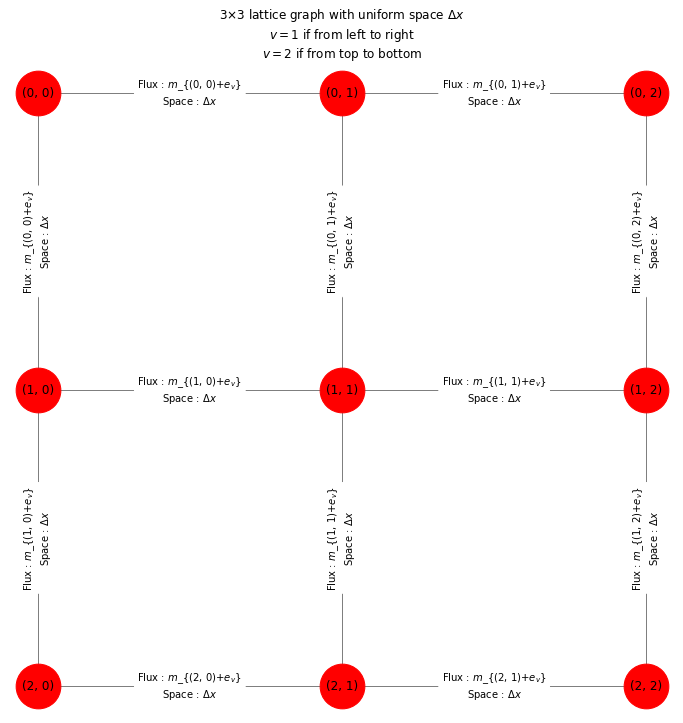

In [2]:
plt.figure(figsize=(12,12))

L = 3
N = L**2 # N = total number of nodes in the graph
d = 2
G = nx.grid_2d_graph(L,L)
liste = {}
        
pos = dict( (n, n) for n in G.nodes() )
labels = dict( ((i, j), (abs(j-L+1), i)) for i, j in G.nodes() )

for i, g in enumerate(G.edges()):
    if g[0][0] < g[1][0]:
        liste[g] = 'Flux : $m\_\{$'+str(labels[g[0]])+'$+e_v\}$'+'\n'+'Space : $\\Delta x$'
    else:
        liste[g] = 'Flux : $m\_\{$'+str(labels[g[1]])+'$+e_v\}$'+'\n'+'Space : $\\Delta x$'
        
#edge_labels=dict( ((i,j), '$m\_$'+str((abs(i[1]-L+1), i[0]))+'$+\\frac{1}{2} e_v$'+'\n'+'$\Delta x$') 
#                 for i, j in G.edges())
edge_labels = liste

options = {
      'node_color' : 'red',
      'node_size'  : 2000,
      'edge_color' : 'tab:grey',
      'with_labels': True,
      'pos':pos,
    'labels':labels}

nx.draw_networkx(G, **options)
nx.draw_networkx_edge_labels(G,pos,edge_labels)
plt.axis('off')
plt.title(str(L)+'$\\times$'+str(L)+' lattice graph with uniform space $\Delta x$'+'\n'+'$v=1$ if from left to right'+'\n'+'$v=2$ if from top to bottom')
plt.show()

In the above example, the matrix $\mathbf{m}=(m_x,m_y)$ would be a tensor of shape $3\times 3\times 2$.
- In theory, $m_{x} \in \mathbb{R}^{(n-1) \times n}$ as a step of $\Delta x$ on the point $x_n$ would lead us to be out of bound, hence $n-1$ for the first component and $n$ for the second component. To avoid dimensions issues, we decide to pad the last row with $0$ to form a $3\times 3\times 2$ tensor.
- Equivalently, $m_{y} \in \mathbb{R}^{n \times(n-1)}$, as a step of $\Delta y$ at the point $y_n$ would lead us to be out of bound, hence $n-1$ for the first component and $n$ for the second component. To avoid dimensions issues, we decide to pad the last column with $0$ to form a $3\times 3\times 2$ tensor.

### Mathematical results

We saw previously that the problem (2) can be finally reformulated as follow : 

$$
\begin{array}{cl}
\underset{\mathbf{m}}{\operatorname{minimize}} & \sum_{i=1}^{n} \sum_{j=1}^{n}L(\mathbf{m}_{ij}) \,\,\,\,\,\,\,\, (3) \\  
\text { subject to } & \operatorname{div}(\mathbf{m})+\rho^{1}-\rho^{0}=0
\end{array}
$$

Procedure (3) is a convex differentiable optimization problem, in "higher" dimension, in the sense that we are dealing with matrices instead of real numbers. Hence, we can use the classical tool to solve this type of problem, such as the Dual reformulation.  
The Langragian of the problem is given by : 

$$
L(\mathbf{m}, \Phi)=\|\mathbf{m}\|_{1,2}+\left\langle\Phi, \operatorname{div}(\mathbf{m})+\rho^{1}-\rho^{0}\right\rangle
$$

with 

$$
\|\mathbf{m}\|_{1,2}=\sum_{i=1}^{n} \sum_{j=1}^{n}\left\|\mathbf{m}_{i j}\right\|_{2}=\sum_{i=1}^{n} \sum_{j=1}^{n} \sqrt{m_{x, i j}^{2}+m_{y, i j}^{2}}
$$

and $\langle\cdot,\cdot\rangle$ denotes the inner product between matrix, $i.e$ : 

$$
\langle A, B\rangle=\sum_{i=1}^{n} \sum_{j=1}^{n} A_{i j} B_{i j}
$$

Problem (3) becomes : 

$$
\min _{\mathbf{m}} \max _{\Phi} \quad L(\mathbf{m}, \Phi)
$$

The first-order primal-dual conditions can be computed, and proved to be : 

$$
\begin{aligned}
\mathbf{m}^{k+1} &=\underset{\mathbf{m}}{\operatorname{argmin}}\left\{\|\mathbf{m}\|_{1,2}+\left\langle\Phi^{k}, \operatorname{div}(\mathbf{m})\right\rangle+\frac{1}{2 \mu}\left\|\mathbf{m}-\mathbf{m}^{k}\right\|_{2}^{2}\right\} \\
\Phi^{k+1} &=\underset{\Phi}{\operatorname{argmax}}\left\{\left\langle\Phi, \operatorname{div}\left(2 \mathbf{m}^{k+1}-\mathbf{m}^{k}\right)+\rho^{1}-\rho^{0}\right\rangle-\frac{1}{2 \tau}\left\|\Phi-\Phi^{k}\right\|_{2}^{2}\right\}
\end{aligned}
$$

where $\mu, \tau>0$ are step sizes, and $\|\cdot\|_{2}^{2}$ is classicaly defined as :

$$
\left\|\mathbf{m}-\mathbf{m}^{k}\right\|_{2}^{2}=\sum_{i=1}^{n-1} \sum_{j=1}^{n}\left(m_{x, i j}-m_{x, i j}^{k}\right)^{2}+\sum_{i=1}^{n} \sum_{j=1}^{n-1}\left(m_{y, i j}-m_{y, i j}^{k}\right)^{2}
$$

and

$$
\left\|\Phi-\Phi^{k}\right\|_{2}^{2}=\sum_{i=1}^{n} \sum_{j=1}^{n}\left(\Phi_{i j}-\Phi_{i j}^{k}\right)^{2}
$$

Now it remains to compute a closed form solution to the last optimization problem. This solution is given by : 

$$
\begin{array}{l}
\tilde{\mathbf{m}}_{i j}^{k+1}=\operatorname{shrink}_{2}\left(\tilde{\mathbf{m}}_{i j}^{k}+\mu\left(\tilde{\nabla} \Phi^{k}\right)_{i j}, \mu\right) \text { for } i, j=1, \ldots, n \\
\Phi_{i j}^{k+1}=\Phi_{i j}^{k}+\tau\left(\left(\operatorname{div}\left(2 \mathbf{m}^{k+1}-\mathbf{m}^{k}\right)\right)_{i j}+\rho_{i j}^{1}-\rho_{i j}^{0}\right) \text { for } i, j=1, \ldots, n
\end{array}
$$

with 

$$
\begin{array}{l}
\tilde{m}_{x, i j}=\left\{\begin{array}{ll}
m_{x, i j} & \text { for } i<n \\
0 & \text { for } i=n
\end{array}\right. \\
\tilde{m}_{y, i j}=\left\{\begin{array}{ll}
m_{y, i j} & \text { for } j<n \\
0 & \text { for } j=n
\end{array}\right.
\end{array}
$$

for $i, j=1, \ldots, n$. We also define $\tilde{\nabla} \Phi=\left((\tilde{\nabla} \Phi)_{x},(\tilde{\nabla} \Phi)_{y}\right) \in \mathbb{R}^{2 \times n \times n}$, where

$$
(\tilde{\nabla} \Phi)_{x, i j}=\left\{\begin{array}{ll}
(\nabla \Phi)_{x, i j} & \text { for } i<n \\
0 & \text { for } i=n
\end{array}\right.
$$

$$
(\tilde{\nabla} \Phi)_{y, i j}=\left\{\begin{array}{ll}
(\nabla \Phi)_{y, i j} & \text { for } j<n \\
0 & \text { for } j=n
\end{array}\right.
$$

and for $\Phi \in \mathbb{R}^{n \times n},$ the discrete gradient operator $\nabla \Phi=\left((\nabla \Phi)_{x},(\nabla \Phi)_{y}\right)$ is defined as

$$
\begin{array}{ll}
(\nabla \Phi)_{x, i j}=(1 / \Delta x)\left(\Phi_{i+1, j}-\Phi_{i, j}\right) & \text { for } i=1, \ldots, n-1, j=1, \ldots, n \\
(\nabla \Phi)_{y, i j}=(1 / \Delta x)\left(\Phi_{i, j+1}-\Phi_{i, j}\right) & \text { for } i=1, \ldots, n, j=1, \ldots, n-1 .
\end{array}
$$

and 

$$
\operatorname{shrink}_{2}(v, \mu)=\left\{\begin{array}{ll}
\left(1-\mu /\|v\|_{2}\right) v & \text { for }\|v\|_{2} \geq \mu \\
0 & \text { for }\|v\|_{2}<\mu
\end{array}\right.
$$

*Proof* : 

We have : 

$$
\begin{array}{l}
\underset{\mathbf{m}}{\operatorname{argmin}}\left\{\|\mathbf{m}\|_{1,2}+\left\langle\Phi^{k}, \operatorname{div}(\mathbf{m})\right\rangle+\frac{1}{2 \mu}\left\|\mathbf{m}-\mathbf{m}^{k}\right\|_{2}^{2}\right\} \\
=\underset{\mathbf{m}}{\operatorname{argmin}}\left\{\sum_{i j}\left\|\mathbf{m}_{i j}\right\|_{1,2}+\sum_{i j}\frac{1}{\Delta x} \Phi_{i j}^{k}\operatorname{div}(\mathbf{m}_{i j})+\sum_{i j}\frac{1}{2 \mu}\left\|\mathbf{m}_{i j}-\mathbf{m}_{i j}^{k}\right\|_{2}^{2}\right\} \\
=\underset{\mathbf{m}}{\operatorname{argmin}}\left\{\sum_{i j}\left\|\mathbf{m}_{i j}\right\|_{1,2}+\frac{1}{\Delta x}\sum_{i j} \Phi_{i j}^{k}\left(m_{x, i j}-m_{x,(i-1) j}+m_{y, i j}-m_{y, i(j-1)}\right)+\sum_{i j}\frac{1}{2 \mu}\left\|\mathbf{m}_{i j}-\mathbf{m}_{i j}^{k}\right\|_{2}^{2}\right\} \\
=\underset{\mathbf{m}}{\operatorname{argmin}}\left\{\sum_{i j}\left(\left\|\mathbf{m}_{i j}\right\|_{1,2}+\frac{1}{\Delta x} \Phi_{i j}^{k}\left(m_{x, i j}-m_{x,(i-1) j}+m_{y, i j}-m_{y, i(j-1)}\right)+\frac{1}{2 \mu}\left\|\mathbf{m}_{i j}-\mathbf{m}_{i j}^{k}\right\|_{2}^{2}\right)\right\} \end{array}$$

Now, recall that $\nabla \Phi=(1 / \Delta x)\left(\left(\Phi_{i+1, j}-\Phi_{i, j}\right),\left(\Phi_{i, j+1}-\Phi_{i, j}\right)\right)$ and $
\mathbf{m}_{i j}=\left(m_{x, i j}, m_{y, i j}\right)
$. Then, developping the expression above and using the change of variable $i'=i+1$ and $j'=j+1$, then thanks to the zero-padding at the boundary, we can finally write that : 

$$
\underset{\mathbf{m}}{\operatorname{argmin}}\left\{\|\mathbf{m}\|_{1,2}+\left\langle\Phi^{k}, \operatorname{div}(\mathbf{m})\right\rangle+\frac{1}{2 \mu}\left\|\mathbf{m}-\mathbf{m}^{k}\right\|_{2}^{2}\right\}=\underset{\mathbf{m}}{\operatorname{argmin}}\left\{\sum_{i j}\left(\left\|\mathbf{m}_{i j}\right\|_{1,2}-\left(\nabla \Phi^{k}\right)_{i j}^{T} \mathbf{m}_{i j}+\frac{1}{2 \mu}\left\|\mathbf{m}_{i j}-\mathbf{m}_{i j}^{k}\right\|_{2}^{2}\right)\right\}
$$

Using the First Order Condition gives us : 

$$
\begin{align}
\frac{\partial}{\partial \mathbf{m}_{i j}} = \frac{\mathbf{m}_{i j}}{\left\|\mathbf{m}_{i j}\right\|_{1,2}}-\nabla \Phi^{k}_{i j}+\frac{1}{\mu}(\mathbf{m}_{i j}-\mathbf{m}_{i j}^{k}) = 0\\
\iff \left(\frac{1}{\left\|\mathbf{m}_{i j}\right\|_{1,2}}+\frac{1}{\mu}\right)\mathbf{m}_{i j}-\frac{1}{\mu}\mathbf{m}_{i j}^k-\nabla \Phi^{k}_{i j} &=0\\
\iff \left(1+\frac{\mu}{\left\|\mathbf{m}_{i j}\right\|_{1,2}}\right)\mathbf{m}_{i j}=\nabla \Phi^{k}_{i j}\mu+\mathbf{m}_{i j}^k
\end{align}$$

which leads us to :

$$\tilde{\mathbf{m}}_{i j}^{k+1}=\operatorname{shrink}_{2}\left(\tilde{\mathbf{m}}_{i j}^{k}+\mu\left(\tilde{\nabla} \Phi^{k}\right)_{i j}, \mu\right) \text { for } i, j=1, \ldots, n$$

The same analysis carried for the $L_1$-norm leads to the same update for $\mathbf{\Phi}_{i j}$, and the following updates for $\mathbf{m}_{i j}$, where $\epsilon$ is an additionnal regularization parameter : 

$$
\begin{array}{l}
\tilde{m}_{x, i j}^{k+1}=1 /(1+\epsilon \mu) \operatorname{shrink}_{1}\left(\tilde{m}_{x, i j}^{k}+\mu\left(\tilde{\nabla} \Phi^{k}\right)_{x, i j}, \mu\right) \\
\tilde{m}_{y, i j}^{k+1}=1 /(1+\epsilon \mu) \operatorname{shrink}_{1}\left(\tilde{m}_{y, i j}^{k}+\mu\left(\tilde{\nabla} \Phi^{k}\right)_{y, i j}, \mu\right)
\end{array}
$$

with 

$$
\operatorname{shrink}_{1}(v, \mu)=\left\{\begin{array}{ll}
(1-\mu /|v|) v & \text { for }|v| \geq \mu \\
0 & \text { for }|v|<\mu
\end{array}\right.
$$

## II - Algorithms 

The two optimization updates obtained above allow to state the main algorithm defined in the paper of Li, Ryu, Osher, Yin, and Gangbo.

$$
\begin{array}{l}
\hline \text { Primal-Dual for EMD- } L_{2} \\
\quad \begin{array}{c}
\text { Input: Discrete probabilities } \rho^{0}, \rho^{1} \\
\text { Initial guess of } \mathbf{m}^{0} \text { , step size } \mu, \tau \\
\text { Output: } \mathbf{m} \text { and EMD value }\|\mathbf{m}\|_{1,2}
\end{array} \\
\hline \text { 1. } \quad \text { for } k=1,2, \cdots \quad \text { (Iterate until convergence) } \\
\text { 2. } \quad \quad \tilde{\mathbf{m}}_{i j}^{k+1}=\operatorname{shrink}_{2}\left(\tilde{\mathbf{m}}_{i j}^{k}+\mu\left(\tilde{\nabla} \Phi^{k}\right)_{i j}, \mu\right) \text { for } i, j=1, \ldots, n \\
\text { 3. } \quad \Phi_{i j}^{k+1}=\Phi_{i j}^{k}+\tau\left(\left(\operatorname{div}\left(2 \mathbf{m}^{k+1}-\mathbf{m}^{k}\right)\right)_{i j}+\rho_{i j}^{1}-\rho_{i j}^{0}\right) \text { for } i, j=1, \ldots, n \\
\text { 4. end }
\end{array}
$$

$$
\begin{array}{l}
\hline \text { Primal-dual method for EMD }-L_{1} \\
\text { Input: Discrete probabilities } \rho^{0}, \rho^{1} ; \\
\quad \text { Initial guess of } \mathbf{m}^{0}, \text { parameter } \epsilon>0, \text { step size } \mu, \tau . \\
\text { Output: } \mathbf{m} \text { and EMD value }\|\mathbf{m}\|_{1,1} \text { . } \\
\hline \text { 1. } \quad \text { for } k=1,2, \cdots \text { (Iterate until convergence) } \\
2 . \quad \quad \tilde{m}_{c, i j}^{k+1}=1 /(1+\epsilon \mu) \operatorname{shrink}_{1}\left(\tilde{m}_{c, i j}^{k}+\mu\left(\tilde{\nabla} \Phi^{k}\right)_{c, i j}, \mu\right) \text { for } i, j=1, \ldots, n \text { and } c=x, y \\
\text { 3. } \quad \Phi_{i j}^{k+1}=\Phi_{i j}^{k}+\tau\left(\left(\operatorname{div}\left(2 \mathbf{m}^{k+1}-\mathbf{m}^{k}\right)\right)_{i j}+\rho_{i j}^{1}-\rho_{i j}^{0}\right) \text { for } i, j=1, \ldots, n \\
\text { 4. end }
\end{array}
$$

#### Our code

We decided to carry a lot of intermediary functions in order to achieve the optimal transport. We used the same data as the authors, which are different images. 
- We have a starting image : this is considered our $\rho^0$.
- We have a "target" image : the one towards which we want to transport the first image, $\rho^1$.

The algorithms aim at computing the optimal flow, namely $\mathbf{m}=(m_x,m_y)$. We tested our algorithms for different values of $n$, the size of the grid (here, the image).

In [3]:
## a few imports

import pandas as pd
import scipy
import numpy as np
import networkx as nx
from numpy import linalg
import math
import seaborn as sns
import numpy.matlib
import sys 
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('dark')

We test our algorithms using an original image and a target black&white images of a cat. The goal is to crouch the standing cat. As the authors did, we test the algorithms on different sizes of grids : 

- $n\times n$ = $128\times 128$
- $n\times n$ = $256\times 256$
- $n\times n$ = $512\times 512$
- $n\times n$ = $1024\times 1024$

We use mainly the $256\times 256$ images in order to use a great number of iterations without having access to a GPU. In the last part, the multilevel aspect will allow us to test the new algorithms on the largest grid.

In [4]:
mat = sio.loadmat('EMD/data/cat256.mat') 
print(sorted(mat.keys()))
mat

['__globals__', '__header__', '__version__', 'mu1', 'mu2']


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Oct  1 21:34:26 2018',
 '__version__': '1.0',
 '__globals__': [],
 'mu1': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'mu2': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])}

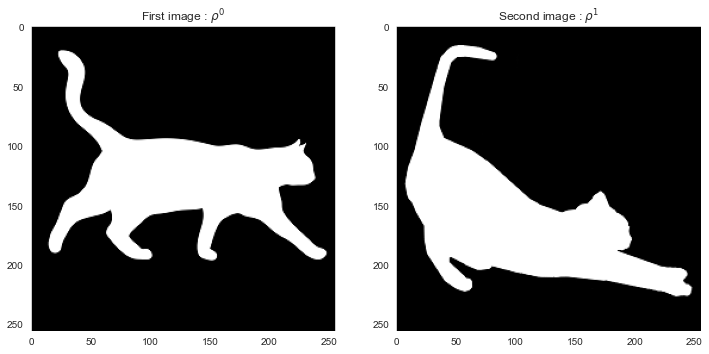

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12,7))
axes[0].imshow(mat['mu1'], cmap='gray')
axes[0].set_title('First image : $\\rho^0$')
axes[1].imshow(mat['mu2'], cmap='gray')
axes[1].set_title('Second image : $\\rho^1$')
plt.show()

The objective is to find the optimal flux in order to move from the standing cat to the crouching cat.

In [6]:
def ReadMAT(filename) : 
    """A function to create a OT problem from a .mat file.
    The .mat file should provide "mu1" and "mu2"."""

    mat = sio.loadmat(filename)
    img1 = np.array(mat['mu1'] , dtype='double')
    img2 = np.array(mat['mu2'] , dtype='double')

    (Mx1, My1) = img1.shape
    (Mx2, My2) = img2.shape
    M = max(Mx1,My1,Mx2,My2)

    Mpower = math.ceil(math.log(M-1)/math.log(2))
    M = 2**(Mpower) + 1

    h = 1/(M-1) # 1/(M-1)
    x = np.arange(0,1,h)
    y = np.arange(0,1,h)


    # The following operation is to add a zero boundary
    # The reason why we do this is:
    # In the grid system, if there are 256*256 "squares",
    # there are 257*257 nodes.

    rho0 = np.pad(img1, pad_width = ((0,M-Mx1),(0,M-My1)), mode='constant') 
    rho1 = np.pad(img2, pad_width = ((0,M-Mx2),(0,M-My2)), mode='constant') 

    min1 = np.min(rho0)
    min2 = np.min(rho1)
    
    if min1 < 0 :
        rho0 = rho0 - min1 # must be non-negative
     
    if min2 < 0 :
        rho1 = rho1 - min2

    rho0 = rho0 / np.sum(rho0)
    rho1 = rho1 / np.sum(rho1)
    rho0 = rho0 / h / h
    rho1 = rho1 / h / h
     
    return   h, rho0, rho1, x, y

In [7]:
def Div(m, dx) : 
    """A function to calculate the divergence of flux m"""
    
    Mx = m.shape[0]
    My = m.shape[1]
    phi = np.zeros(shape=(Mx,My))
    phi[1:Mx,:] = phi[1:Mx,:] + (m[1:Mx,:,0] - m[0:Mx-1,:,0])/dx
    phi[0,:] = phi[0,:] + (m[0,:,0]/dx)
    phi[:,1:My] = phi[:,1:My] + (m[:,1:My,1] - m[:,0:My-1,1])/dx
    phi[:,0] = phi[:,0] + (m[:,0,1]/dx)
    
    return phi

In [8]:
def Constraint(m, rho0, rho1, dx) : 
    """A function to calculate the constraint residual"""

    res = rho1 - rho0 + Div(m,dx)
    c = np.linalg.norm(res)/(np.linalg.norm(rho1-rho0))
    
    return  c 

In [9]:
def Gra(phi, dx) : 
    """A function to calculate the gradient of potential phi."""
    
    Mx = phi.shape[0]
    My = phi.shape[1]
    m = np.zeros(shape=(Mx,My,2))
    m[0:Mx-1,:,0] = (phi[1:Mx,:] - phi[0:Mx-1,:])/dx
    m[:,0:My-1,1] = (phi[:,1:My] - phi[:,0:My-1])/dx

    return m 

In [10]:
def PrimalFunL1(m, dx) : 
    """ A function to calculate the 1,1-norm of m."""

    l = np.sum(np.abs(m))
    l = l * dx * dx

    return l


def PrimalFunL2(m, dx):
    """A function to calculate the 2,1-norm of m."""

    l = np.sum(np.sqrt(np.square(m[:,:,0]) + np.square(m[:,:,1])))
    l = l * dx * dx

    return l

def PrimalFunLinf(m, dx) : 
    """A function to calculate the inf,1-norm of m.""" 

    l = sum(sum(np.maximum(abs(m[:,:,0]),abs(m[:,:,1]))))
    l = l * dx * dx

    return l

In [11]:
def ShrinkL1(D, tau) :
    """min |Px| + |Py| + 1/2/tau ((Px - Dx)^2 + (Py - Dy)^2)"""  
    
    Dx = D[:,:,0]
    Dy = D[:,:,1]
    Zx = abs(Dx) - tau # intermediary term 
    Zy = abs(Dy) - tau # intermediary term
    
    P = np.zeros(shape=(Dx.shape[0], Dy.shape[1], 2))
    Px = np.sign(Dx) * np.where(Zx < 0, 0, Zx)
    Py = np.sign(Dy) * np.where(Zy < 0, 0, Zy)
    P[:,:,0] = Px
    P[:,:,1] = Py

    return P


def ShrinkL2(D,tau) : 
    """min sqrt(Px.^2 + Py.^2) + 1/2/tau ((Px - Dx)^2 + (Py - Dy)^2)""" 

    Dx = D[:,:,0]
    Dy = D[:,:,1]
    Dnorm = np.sqrt(np.square(Dx) + np.square(Dy))
    idx = np.nonzero(Dnorm)
    tmp = np.maximum(Dnorm - tau, 0)
    
    P = np.zeros(shape=(Dx.shape[0], Dy.shape[1], 2))
    Px = np.zeros(Dx.shape)
    Px[idx] = (Dx[idx]/Dnorm[idx]) * tmp[idx]
    P[:,:,0] = Px

    Py = np.zeros(Dy.shape)
    Py[idx] = (Dy[idx]/Dnorm[idx]) * tmp[idx]
    P[:,:,1] = Py

    return P

Note that the discrete divergence operator is a linear operator : $\operatorname{div}(\mathbf{m}^{k+1}-\mathbf{m}^{k})=\operatorname{div}(\mathbf{m}^{k+1})-\operatorname{div}(\mathbf{m}^{k})$. Hence, in the following code, we can write `divnewm-divm` for `div(newm-m)`. A short example : 

In [12]:
dx = 0.09435
print(Div(2*np.ones((3,3,2))-np.ones((3,3,2)),dx))
print('')
print(Div(2*np.ones((3,3,2)),dx)-Div(np.ones((3,3,2)),dx))

[[21.19766826 10.59883413 10.59883413]
 [10.59883413  0.          0.        ]
 [10.59883413  0.          0.        ]]

[[21.19766826 10.59883413 10.59883413]
 [10.59883413  0.          0.        ]
 [10.59883413  0.          0.        ]]


In [13]:
def PDupdate(p, m, phi, dx, mu, tau, rho0, rho1, dispIters, tol) : 
    """A function to carry a single step update of the algorithm"""
    
    newm = m
    newphi = phi
    
    s = 0

    for k in range (0,dispIters):
        
        m = newm
        phi = newphi
    
        if p == 1 :
            newm = ShrinkL1(m + mu*Gra(phi, dx), mu)
            
        if p == 2 :
            newm = ShrinkL2(m + mu*Gra(phi, dx), mu)
            
        if p == 3 :
            newm = ShrinkLinf(m + mu*Gra(phi, dx), mu)
            
        divnewm = Div(newm, dx)
        divm = Div(m, dx)
        newphi = phi + tau*(rho1 - rho0 + 2*divnewm - divm)
        
        residual = (1/mu) * (np.linalg.norm(m-newm)**2) 
        residual = residual + (1/tau) * (np.linalg.norm(phi-newphi)**2) 
        residual = residual - 2 * np.sum((newphi - phi)*(divnewm - divm)) 
        residual = residual * dx * dx
        
        s = s + 1

        if residual < tol :
            
            break

    optinf = {}
    if p == 1 :
        optinf['primal_fun'] = PrimalFunL1(m, dx)
            
    if p == 2 :
        optinf['primal_fun'] = PrimalFunL2(m, dx)
            
    if p == 3 :
        optinf['primal_fun'] = PrimalFunLinf(m, dx)
            
    optinf['constraint'] = Constraint(m, rho0, rho1, dx)
    optinf['pd_residual'] = residual
    optinf['support'] = np.count_nonzero(m)
    
    return newm, newphi, optinf, s

def W1PD(dx, rho0, rho1, p, mu, tau, MaxIter, tol, dispIter, Mx, My, m, phi): # OKAY
    """An implement of the algorithm in the following paper (without parallelization)
    : A PARALLEL METHOD FOR EARTH MOVER’S DISTANCE""" 

    # initialization
    info_now = {}
    info_now['primal_fun'] = 0
    info_now['constraint'] = 0
    info_now['pd_residual'] = 0
    info_now['support'] = 0

    outLoops = math.floor(MaxIter/dispIter)
    optinf = []

    ## main loop

    for k in range(0, outLoops):
        
        m,phi,info_now,iters = PDupdate(p, m, phi, dx, mu, tau, rho0, rho1, dispIter, tol)
        optinf.append(info_now)
        
        if info_now['pd_residual'] < tol:
            break
            
        iters = (k-1)*dispIter + iters

    return m, phi, optinf, iters

## III - Simulation studies

In this section, we propose tu run the below algorithms and provide visual results of these, as well as comments and interpretation about the results. The images on which the flux was displayed are the cat images of grid size $n=256$. We run our expriments on a MacBook Pro with 8 Go of RAM and, 1.4 GHz Intel Core i5 4-cores processor.

### EMD $L_1$ algorithm

In [14]:
h, rho0, rho1, x, y = ReadMAT('EMD/data/cat256.mat')

# hyperparameters

dx = h
p = 1
mu = 1e-7           # h/27   # UNCOMMENT FOR DEFAULT PARAMETERS
tau = 2             # h/27
dispIter = 10       # 100
#dispIters = 100    # 100
MaxIter = 15000     # 200
tol = 1e-6
Mx = np.shape(rho0)[0]
My = np.shape(rho0)[1]
m = np.zeros((Mx,My,2))
phi = np.zeros((Mx, My))

m, phi, optinf, iters = W1PD(dx, rho0, rho1, p, mu, tau, MaxIter, tol, dispIter, Mx, My, m, phi)

We can have a look at the output of a evolution of the residuals of the algorithm. The latter is defined as : 

$$\Delta^2 x\left(\frac{1}{\mu} \left\|\mathbf{m}^k-\mathbf{m}^{k+1}\right\|^2_2+\frac{1}{\tau}\left\|\Phi^k-\Phi^{k+1}\right\|^2-2\left\langle\Phi^{k+1}-\Phi^{k},\operatorname{div}(\mathbf{m}^{k+1}-\mathbf{m}^k)\right\rangle\right)$$

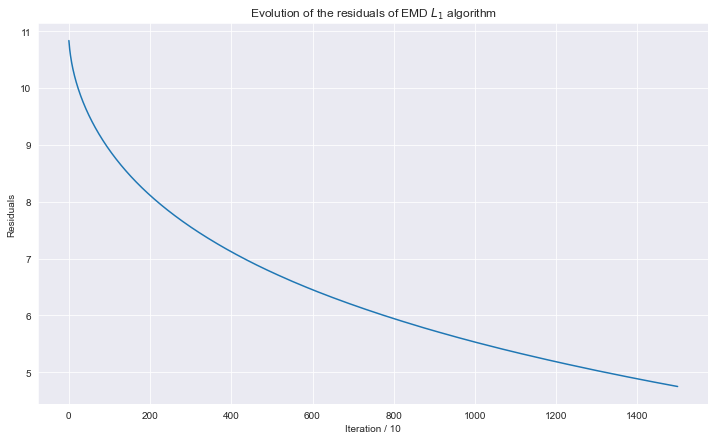

In [15]:
residuals = [opt['pd_residual'] for opt in optinf]
plt.figure(figsize=(12,7))
plt.plot(residuals)
plt.grid()
plt.xlabel('Iteration / 10')
plt.ylabel('Residuals')
plt.title('Evolution of the residuals of EMD $L_1$ algorithm')
plt.show()

We see the residuals decreasing. It is consistent with a convergence property that is stated in the article.

**Theorem 1.** Assume $\tau \mu<1 / \lambda_{\max }\left(\nabla^{2}\right),$ where $\lambda_{\max }\left(\nabla^{2}\right)$ denotes the largest eigenvalue of the discrete Laplacian operator $\nabla^{2} .$ Then with iterations of EMD $L1$ and EMD $L2$

$$
\left(\mathbf{m}^{k}, \Phi^{k}\right) \rightarrow\left(\mathbf{m}^{\star}, \Phi^{\star}\right)
$$

where $\left(\mathbf{m}^{\star}, \Phi^{\star}\right)$ is a saddle point of $L$, the Lagrangian. Define

$$
R^{k}=(1 / \mu)\left\|\mathbf{m}^{k+1}-\mathbf{m}^{k}\right\|_{2}^{2}+(1 / \tau)\left\|\Phi^{k+1}-\Phi^{k}\right\|_{2}^{2}-2\left\langle\Phi^{k+1}-\Phi^{k}, \operatorname{div}\left(\mathbf{m}^{k+1}-\mathbf{m}^{k}\right)\right\rangle
$$

Then $R^{k} \geq 0$ and $R^{k}=0$ if and only if $\left(\mathbf{m}^{k}, \Phi^{k}\right)$ is a saddle point of of (7) or $R^{k}$
monotonically converges to $0 .$

The proof is available in the section 3.4 in **[0]**.

We now visualize the optimal flow by using the `quaver` attribute of matplotlib. The matrix $\texttt{m[:,:,0]}$ contains the $x$-coordinates of the movements, and $\texttt{m[:,:,1]}$ contains the $y$-coordinates of the movements. We carry first a downsample operation in order to visualize the big matrices properly.

In [16]:
def restrict_m(m):
    """A function to calculate the downsample of flux m."""
    
    Mx = m.shape[0]-1
    My = m.shape[1]-1
    Mxc = int(Mx/2) 
    Myc = int(My/2)
    mc = np.zeros(shape=(Mxc+1, Myc+1, 2))

    mc[0:Mxc, :, 0] = (m[0:(Mx-1):2,0:My+1:2,0] + m[1:(Mx):2,0:My+1:2,0])/2
    mc[:, 0:Myc, 1] = (m[0:Mx+1:2, 0:Mx-1:2, 1] + m[0:Mx+1:2, 1:Mx:2, 1])/2
    
    return mc

In [17]:
def PlotFlow(x, y, m, rho, scale):
    """A function to plot the flow m with potential rho"""
    
    hx = x[1] - x[0]
    hy = y[1] - y[0]

    def extents(f):
        delta = f[1] - f[0]
        return [f[0] - delta/2, f[-1] + delta/2]

    plt.figure(figsize=(15,15))
    im = plt.imshow(rho.T, interpolation='none',
               extent=[0, 1, 0, 1],origin='lower')
    
    end = m.shape[0]
            
    mx = m[:,:,0]
    mx[1:end,:] = (m[0:end-1,:,0]+m[1:end,:,0])/2 

    my = m[:,:,1]
    my[:,1:end] = (m[:,0:end-1,1]+m[:,1:end,1])/2 

    if m.shape[0]>20: 
        [x1,y1] = np.meshgrid(np.linspace(0,1,33),np.linspace(0,1,33)) 
        msmooth = np.zeros(shape=m.shape)
        msmooth[:,:,0] = mx
        msmooth[:,:,1] = my
        while msmooth.shape[0]>33:
            msmooth = restrict_m(msmooth)
        plt.quiver(x1,y1, msmooth[:,:,0].T, msmooth[:,:,1].T,scale=scale,color='blue')


    elif m.shape[0]<=20:
        [x1,y1] = np.meshgrid(x,y)
        msmooth = np.zeroszeros(shape=m.shape)
        msmooth[:,:,0] = mx
        msmooth[:,:,1] = my
        plt.quiver(x1,y1, msmooth[:,:,0].T, msmooth[:,:,1].T,scale=scale,color='blue')

    #plt.ylim(-hy/2,1+hy/2)
    #plt.xlim(-hx/2,1+hx/2)
    plt.savefig('flow_cat.png')
    # Read image 
    img = Image.open('flow_cat.png')
    rotated = img.rotate(270)
    return rotated

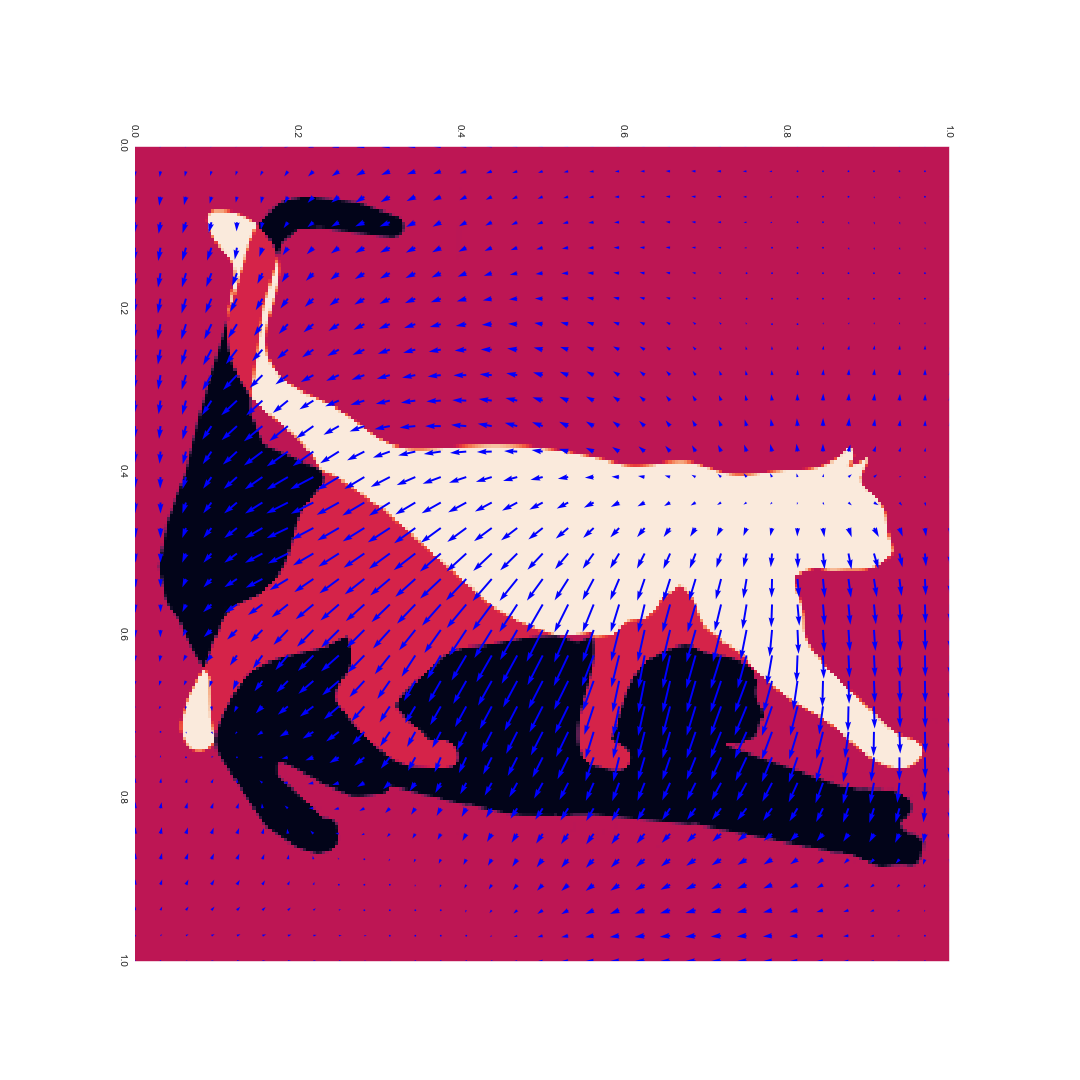

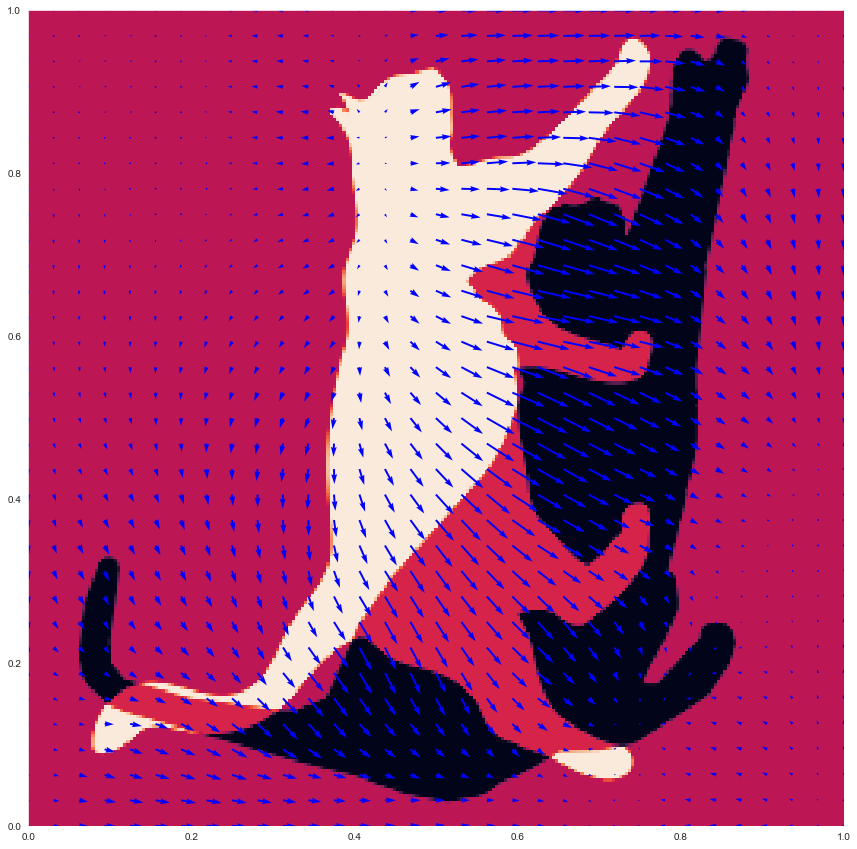

In [18]:
rho = rho0-rho1 # potential
PlotFlow(x, y, m, rho, scale=20)

In [19]:
print('Last iteration :', optinf[-1])
print('')
print('Final L1 energy :',PrimalFunL1(m, dx))

Last iteration : {'primal_fun': 0.39435295131661874, 'constraint': 0.5042854162167887, 'pd_residual': 4.751686447684569, 'support': 131584}

Final L1 energy : 0.394573557662027


**Comments** : even the residuals is not really close to $0$, we can see an interesting flux computed here. Logically, the standing cat will be expected to crouch thanks to a movement oriented toward the bottom left direction, in an curved way. We get a satisfying result with respected to what is presented in the article. However, note that we do not have a GPU at our disposition. Hence, the number of iterations has been dramatically reduced.

### EMD $L_2$ algorithm

We now run the $L_2$ algorithm.

In [20]:
# hyperparameters

dx = h
p = 2
mu = 1e-7           # h/27   # UNCOMMENT FOR DEFAULT PARAMETERS
tau = 2             # h/27
dispIter = 10       # 100
#dispIters = 100    # 100
MaxIter = 15000     # 200
tol = 1e-6
Mx = np.shape(rho0)[0]
My = np.shape(rho0)[1]
m = np.zeros((Mx,My,2))
phi = np.zeros((Mx, My))

m, phi, optinf, iters = W1PD(dx, rho0, rho1, p, mu, tau, MaxIter, tol, dispIter, Mx, My, m, phi)

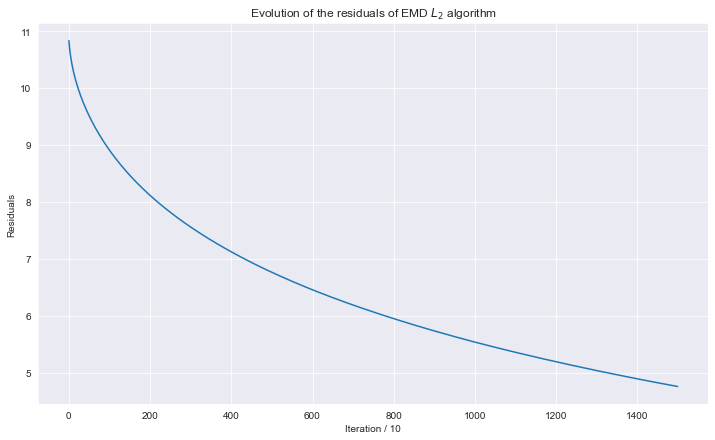

In [21]:
residuals = [opt['pd_residual'] for opt in optinf]
plt.figure(figsize=(12,7))
plt.plot(residuals)
plt.grid()
plt.xlabel('Iteration / 10')
plt.ylabel('Residuals')
plt.title('Evolution of the residuals of EMD $L_2$ algorithm')
plt.show()

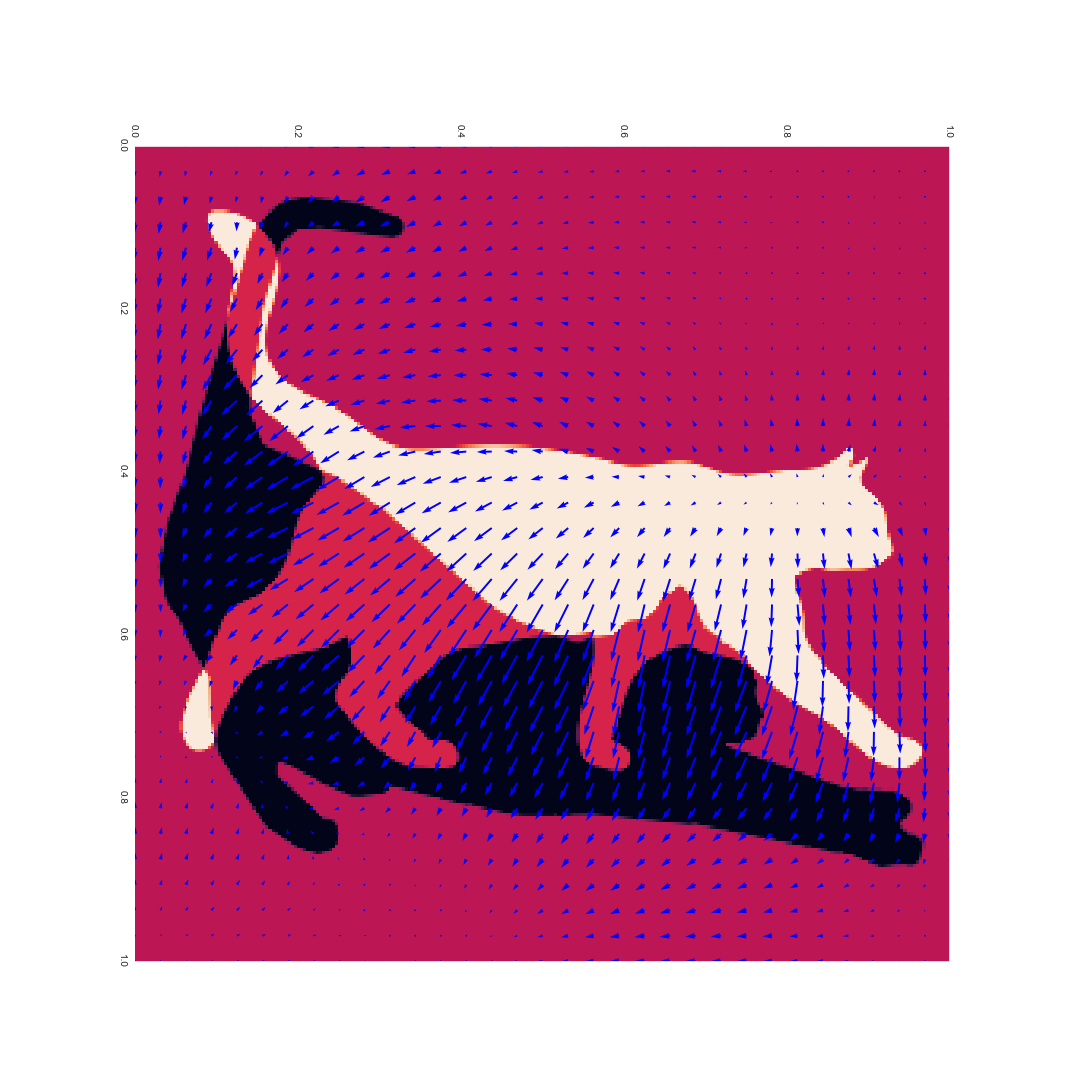

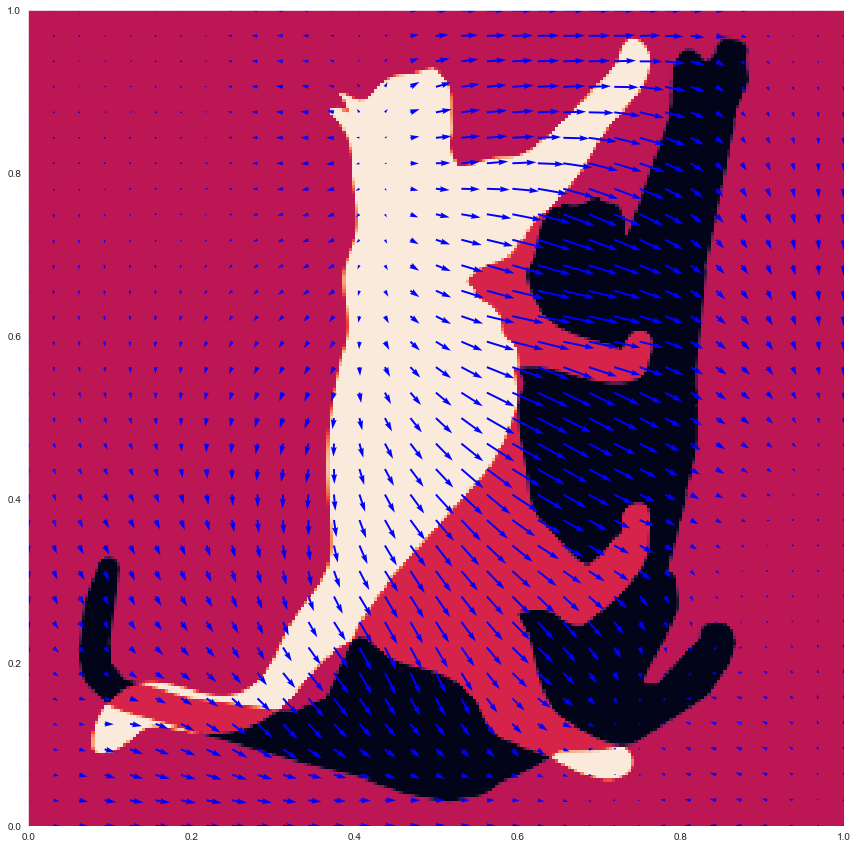

In [22]:
rho = rho0-rho1 # potential
PlotFlow(x, y, m, rho, scale=20)

In [23]:
print('Last iteration :', optinf[-1])
print('')
print('Final L2 energy :',PrimalFunL2(m, dx))

Last iteration : {'primal_fun': 0.30948787583144677, 'constraint': 0.5045704119093342, 'pd_residual': 4.756979973461155, 'support': 131584}

Final L2 energy : 0.30970219822720146


**Comments** : the $L_2$ case gives almost the same result as the $L_1$ case with the same configuration of parameters. However, for some identical sets of hyperparameters for both algorithms, results can become vert different. The parameters that are used above are part of the convenients sets for both algorithms. Furthermore, we noticed during our study that in general, both algorithms were very sensitive to parameters values ; especially, the value of $\mu$ is crucial for obtaining good results. The reason of this sensitivity is that $\mu$ is a parameter that conditions a lot the updates of $\mathbf{m}$ and $\Phi$, regarding the formulas in the algorithm. The shrink operator heavily depends on the value of $\mu$ (as a threshold, and as a value also). Hence, $\Phi$, which depends on $\mathbf{m}$, is also penalized by a "bad" value for $\mu$. Our empirical work has shown that a value of $10^{-8}$ is a good compromise fo this parameter.  
Moreover, the number of iterations plays a major role in the results and convergence of the algorithms. As we only run our experiments on a CPU (not on Colab, due to its unsatisfying interface), we'd rather fix a maximal number of 50000 iterations for instance (which is already slow for our machine). But around 10000/15000 iterations seems to be a fine trade-off between good results and short computation time.

## IV - Discussion and Extensions

In this section, we propose to discuss the relevancy of the algorithm and a further refinement of the paper, in **[6]**. Finally, we propose new ideas and applications inspired by the article of Li, Ryu, Osher, Yin, and Gangbo.

### Multilevel Optimal Transport : an evolution 

Jialin Liu, Wotao Yin, Wuchen Li, Yat Tin Chow proposed an "updated" algorithm **[7]** of **[0]** that speeds up the algorithms EMD $L_1$ and EMD $L_2$. The problematic is the same : find an optimal flux on a discrete grid. Now, the idea is to consider that we face several levels of this grid. The discrete space $\Omega$ is decomposed in $L$ different grids, with steps sizes $h_1,h_2,...,h_L$ respectively, with :

$$\Omega^{h_{1}} \subset \Omega^{h_{2}} \subset \cdots \Omega^{h_{L-1}} \subset \Omega^{h_L=h}$$

and 

$$h_{1}>h_{2}>\cdots>h_{L-1}>h_{L}=h$$

On the $l^{\text {th }}$ level, the optimal flux problem (2) is :

$$
\underset{m_{h_{l}}: \Omega^{h_{l}} \rightarrow \Re^{d}}{\operatorname{minimize}} f\left(m_{h_{l}}\right)
$$
$$
\text { subject to } A_{h_{l}} m_{h_{l}}=\rho_{h_{l}}
$$

with $A_{h_{l}}$ being the corresponding divergence operator matrix.

#### Interpolation of potentials $\phi_{h}$

For any $x \in \Omega^{h_{l}}$ on level $l$, we partition the set of the coordinates $x_{j}$ into two subsets, depending on whether they belong to the grid on the coarser level $l-1$ :

$$
J_{l}=\left\{j: x_{j} \in\left\{0, h_{l-1}, 2 h_{l-1}, \cdots, 1\right\}\right\}
$$

$$
\hat{J}_{l}=\left\{j: x_{j} \in\left\{0, h_{l}, 2 h_{l}, \cdots, 1\right\}, x_{j} \notin\left\{0, h_{l-1}, 2 h_{l-1}, \cdots, 1\right\}\right\}
$$

Define a partial neighborhood of $x$ :

$$
\mathcal{N}_{l}(x)=\left\{y \in \Omega^{h_{l-1}}: y_{j}=x_{j}, \quad \forall j \in J_{l} ; \quad\left|y_{j}-x_{j}\right| \leq h_{l}, \quad \forall j \in \hat{J}_{l}\right\}
$$

The mapping $\phi_{h_{l}}=$ Interpolate $\left(\phi_{h_{l-1}}\right)$ is defined pointwise as:


$\quad \phi_{h_{l}}(x)=\frac{1}{\left|\mathcal{N}_{l}(x)\right|} \sum_{y \in \mathcal{N}_{l}(x)} \phi_{h_{l-1}}(y), \quad \forall x \in \Omega^{h_{l}} .$


For example, if $d=2$ (2D case) and $h_{l}=2^{-(l-1)}, l \geq 2$, the interpolation of $\phi_{h_{l}}$ at $(x_1,x_2)\in\mathbb{R}^2$ can be written as:


$\phi_{h_{l}}\left(x_{1}, x_{2}\right)=\left\{\begin{array}{l}\phi_{h_{l-1}}\left(x_{1}, x_{2}\right), \quad \text { if }\left(x_{1}, x_{2}\right) \in \mathcal{X}_{1}, \\ \left(\phi_{h_{l-1}}\left(x_{1}, x_{2}-h_{l}\right)+\phi_{h_{l-1}}\left(x_{1}, x_{2}+h_{l}\right)\right) / 2, \quad \text { if }\left(x_{1}, x_{2}\right) \in \mathcal{X}_{2} \\ \left(\phi_{h_{l-1}}\left(x_{1}-h_{l}, x_{2}\right)+\phi_{h_{l-1}}\left(x_{1}+h_{l}, x_{2}\right)\right) / 2, \quad \text { if }\left(x_{1}, x_{2}\right) \in \mathcal{X}_{3}, \\ \left(\phi_{h_{l-1}}\left(x_{1}-h_{l}, x_{2}-h_{l}\right)+\phi_{h_{l-1}}\left(x_{1}-h_{l}, x_{2}+h_{l}\right) \ldots\right. \\ \left.+\phi_{h_{l-1}}\left(x_{1}+h_{l}, x_{2}-h_{l}\right)+\phi_{h_{l-1}}\left(x_{1}+h_{l}, x_{2}+h_{l}\right)\right) / 4, \text { otherwise }\end{array}\right.$

where $\left.\mathcal{X}_{1}=\left\{\left(x_{1}, x_{2}\right): x_{1}\left|h_{l-1}, x_{2}\right| h_{l-1}\right\}, \mathcal{X}_{2}=\left\{\left(x_{1}, x_{2}\right): x_{1} \mid h_{l-1}, x_{2}\right\} h_{l-1}\right\}$ and $\mathcal{X}_{3}=$
$\left.\left\{\left(x_{1}, x_{2}\right): x_{1}\right\} h_{l-1}, x_{2} \mid h_{l-1}\right\}$.

#### Interpolation of flux $m_{h}$ 

Due to the zero-flux boundary condition for this problem (as we had in the non-multilevel version), interpolating $m$ is different from $\phi$. The flow $m$ can be viewed as "edge weights". For the $i$ -th coordinate $x \in \Omega_{i}^{h_{l}}$, we use nearest neighbor interpolation: $y_{\mathrm{NN}} \in \arg \min _{\alpha \in \Omega^{h_{l-1}}}\left|\alpha-x_{i}\right| ;$ for the other coordinates, we use the
same method with the parallel method (EMD $L_1$ and $L_2$). Define a neighborhood related with direction $i$ :

$$
\hat{\mathcal{N}}_{l, i}(x)=\left\{y \in \Omega^{h_{l-1}}: y_{j}=x_{j}, \forall j \in J_{l} ; \quad y_{i}=y_{\mathrm{NN}} ; \quad\left|y_{j}-x_{j}\right| \leq h_{l}, \forall j \in \hat{J}_{l} /\{i\} .\right\}
$$

Then the mapping $m_{h_{l}}=$ Interpolate $\left(m_{h_{l-1}}\right)$ is pointwise defined as follows:

$$
m_{h_{l}, i}(x)=\left\{\begin{array}{ll}
\frac{1}{\left|\mathcal{N}_{l}(x)\right|} \sum_{y \in \mathcal{N}_{l}(x)} m_{h_{l-1}, i}(y), & i \in J_{l} \\
\frac{1}{\left|\hat{\mathcal{N}}_{l, i}(x)\right|} \sum_{y \in \hat{N}_{l, i}(x)} m_{h_{l-1}, i}(y), & i \in \hat{J}_{l}
\end{array}\right.
$$

For example, if $d=2$ (2D case) and $h_{l}=2^{-(l-1)}, l \geq 2$, the interpolation of $m_{h_{l}}$ at point $(x_1,x_2)\in\mathbb{R}^2$ can be written as:

\begin{equation}
m_{h_{l}, 1}\left(x_{1}, x_{2}\right)=\left\{\begin{array}{lr}
m_{h_{l-1}, 1}\left(x_{1}, x_{2}\right), & \text { if }\left(x_{1}, x_{2}\right) \in \mathcal{X}_{1}, \\
m_{h_{l-1}, 1}\left(x_{1}-h_{l}, x_{2}\right), & \text { if }\left(x_{1}, x_{2}\right) \in \mathcal{X}_{3}, \\
\left(m_{h_{l-1}, 1}\left(x_{1}, x_{2}-h_{l}\right)+m_{h_{l-1}, 1}\left(x_{1}, x_{2}+h_{l}\right)\right) / 2, \text { if }\left(x_{1}, x_{2}\right) \in \mathcal{X}_{2}, \\
\left(m_{h_{l-1}, 1}\left(x_{1}-h_{l}, x_{2}-h_{l}\right)+m_{h_{l-1}, 1}\left(x_{1}-h_{l}, x_{2}+h_{l}\right)\right) / 2, \\
& \text { otherwise }
\end{array}\right.
\end{equation}

\begin{equation}
m_{h_{l}, 2}\left(x_{1}, x_{2}\right)=\left\{\begin{array}{lr}
m_{h_{l-1}, 2}\left(x_{1}, x_{2}\right), & \text { if }\left(x_{1}, x_{2}\right) \in \mathcal{X}_{1}, \\
m_{h_{l-1}, 2}\left(x_{1}, x_{2}-h_{l}\right), & \text { if }\left(x_{1}, x_{2}\right) \in \mathcal{X}_{2}, \\
\left(m_{h_{l-1}, 2}\left(x_{1}-h_{l}, x_{2}\right)+m_{h_{l-1}, 2}\left(x_{1}+h_{l}, x_{2}\right)\right) / 2, \text { if }\left(x_{1}, x_{2}\right) \in \mathcal{X}_{3}, \\
\left(m_{h_{l-1}, 2}\left(x_{1}-h_{l}, x_{2}-h_{l}\right)+m_{h_{l-1}, 2}\left(x_{1}+h_{l}, x_{2}-h_{l}\right)\right) / 2, \\
\text { otherwise. }
\end{array}\right.
\end{equation}

#### Algorithm 1M Multilevel version of Algorithm

**Input** $: \rho^{0}, \rho^{1}, h, L,$ a sequence of tolerances $\left\{\varepsilon_{l}\right\}_{l=1}^{L} .$

**Initialization:** Let $m_{h_{0}}^{K_{0}}=0, \phi_{h_{0}}^{K_{0}}=0 .$

**for** $l=1,2, \cdots, L$ **do** 

   **Initialize the current level**:
$$
                m_{h_{l}}^{0}=\text { Interpolate }\left(m_{h_{l-1}}^{K_{l-1}}\right), \quad \phi_{h_{l}}^{0}=\text { Interpolate }\left(\phi_{h_{l-1}}^{K_{l-1}}\right)
$$


$$
\left(m_{h_{l}}^{K_{l}}, \phi_{h_{l}}^{K_{l}}\right)=\text {W1PD} \left(\rho^{0}, \rho^{1}, h_{l}, m_{h_{l}}^{0}, \phi_{h_{l}}^{0}, \varepsilon_{l}\right)
$$
**end**

Output: $m_{h_{L}}^{K_{L}}, \phi_{h_{L}}^{K_{L}}$

In [24]:
def interpolate(v):
    """A function to calculate the interpolation of potential v."""
    
    Mx = v.shape[0]-1 
    My = v.shape[1]-1
    Mxf = Mx*2 
    Myf = My*2
    vf = np.zeros((Mxf+1, Myf+1))

    vf[0:Mxf+1:2,0:Myf+1:2] = v
    vf[0:Mxf+1:2,1:Myf:2] = (v[:,0:My]+v[:,1:My+1])/2
    vf[1:Mxf:2, 0:Myf+1:2] = (v[0:Mx,:]+v[1:Mx+1,:])/2
    vf[1:Mxf:2, 1:Myf:2] = (v[0:Mx,0:My]+v[1:Mx+1,0:My]+v[0:Mx,1:My+1] + v[1:Mx+1,1:My+1])/4
    
    return vf

In [25]:
def interpolate_m(m):
    """A function to calculate the interpolation of flux m."""
    
    Mx = m.shape[0]-1
    My = m.shape[1]-1
    Mxf = Mx*2 
    Myf = My*2
    mf = np.zeros((Mxf+1, Myf+1, 2))

    mf[1:Mxf:2, 0:Myf+1:2, 0] = m[0:Mx, :, 0]
    mf[0:Mxf-1:2, 0:Myf+1:2, 0] = m[0:Mx, :, 0]
    mf[1:Mxf:2, 1:Myf:2, 0] = (m[0:Mx, 0:My, 0]+m[0:Mx, 1:My+1, 0])/2
    mf[0:Mxf-1:2, 1:Myf:2, 0] = (m[0:Mx, 0:My, 0]+m[0:Mx, 1:My+1, 0])/2

    mf[0:Mxf+1:2, 1:Myf:2, 1] = m[:, 0:My, 1]
    mf[0:Mxf+1:2, 0:Myf-1:2, 1] = m[:, 0:My, 1]
    mf[1:Mxf:2, 1:Myf:2, 1] = (m[0:Mx, 0:My, 1]+m[1:Mx+1, 0:My, 1])/2
    mf[1:Mxf:2, 0:Myf-1:2, 1] = (m[0:Mx, 0:My, 1]+m[1:Mx+1, 0:My, 1])/2
    
    return mf

In [26]:
def restrict(v):
    """A function to calculate the downsample of potential v."""
    
    Mx = v.shape[0]-1; 
    My = v.shape[1]-1
    Mxc = Mx//2 
    Myc = My//2
    vc = np.zeros((Mxc+1, Myc+1))

    ind = range(2,(Mx-1),2) 
    ind_m = range(1,(Mx-2),2) 
    ind_p = range(3,Mx,2) 
    
    vc[1:Mxc,1:Myc] = ( 4*v[ind,ind] +
                    2*(v[ind_m,ind]+v[ind_p,ind]+ v[ind,ind_m]+
                       v[ind,ind_p]) + 
                       (v[ind_m,ind_m]+v[ind_m,ind_p]+ 
                       v[ind_p,ind_m]+v[ind_p,ind_p]) )/16
    
    vc[0,1:Myc] = ( 4*v[0,ind] + 2*(v[1,ind]+ 
                v[0,ind_m]+v[0,ind_p]) + 
                (v[1,ind_m]+v[1,ind_p]) )/12
    
    vc[Mxc, 1:Myc] = ( 4*v[Mx,ind] + 2*(v[Mx-1,ind]+ 
                       v[Mx,ind_m]+v[Mx,ind_p]) + 
                      (v[Mx-1,ind_m]+v[Mx-1,ind_p]) )/12
    
    vc[1:Mxc, 0] = ( 4*v[ind,0] + 
                    2*(v[ind_m,0]+v[ind_p,0]+ v[ind,1]) +
                      (v[ind_m,1]+ v[ind_p,1]) )/12
    
    vc[1:Mxc, Myc] = ( 4*v[ind,My] + 
                    2*(v[ind_m,My]+v[ind_p,My]+ v[ind,My-1]) + 
                      (v[ind_m,My-1]+ v[ind_m,My-1]) )/12
    
    vc[0,0] = ( 4*v[0,0] + 2*(v[1,0]+v[0,1]) + v[1,0] )/9
    vc[0,Myc] = ( 4*v[0,My] + 2*(v[1,My]+ v[0,My-1]) + v[1,My-1] )/9
    vc[Mxc,0] = ( 4*v[Mx,0] + 2*(v[Mx-1,0]+ v[Mx,1]) + v[Mx-1,1] )/9
    vc[Mxc,Myc] = ( 4*v[Mx,My] + 2*(v[Mx-1,My]+v[Mx,My-1]) + v[Mx-1,My-1] )/9
    
    return vc

In [27]:
def W1PD_ML(dx, rho0, rho1, p, mu, tau, level):
    """An implement of the Algorithm 1M in the following paper
     J. Liu, W. Yin, W.C. Li, Y.T. Chow, "Multilevel Optimal Transport: 
     a Fast Approximation of Wasserstein-1 distances", submitted, 2018."""

    ## initialization
    rho0s = level * [0]
    rho1s = level * [0]
    rho0s[level-1] = rho0
    rho1s[level-1] = rho1

    def normalizerho(x):
        return x / np.sum(x)

    for l in reversed(range(0,level-1)):
        h = dx * (2)**(level-l)
        rho0s[l] = restrict(rho0s[l+1])
        rho1s[l] = restrict(rho1s[l+1])
        rho0s[l] = normalizerho(rho0s[l])/h/h
        rho1s[l] = normalizerho(rho1s[l])/h/h

    Mx = rho0s[0].shape[0]
    My = rho0s[0].shape[1]
    m_next = np.zeros((Mx, My, 2))
    phi_next = np.zeros((Mx, My))

    ## main loop
    for k in range(level):
        h = dx * (2)**(level-k);
        mu_ = mu * (2)**(level-k)
        tau_ = tau * (2)**(level-k)
        m_ = m_next
        phi_ = phi_next
        m, phi, _, iters = W1PD(h, rho0s[k], rho1s[k], p, mu_, tau_, MaxIter, tol, dispIter, Mx, My,
                                m_, phi_)
    
        if k < level:
            m_next = interpolate_m(m)
            phi_next = interpolate(phi)
            
    return m, phi

In [28]:
h, rho0, rho1, x, y = ReadMAT('EMD/data/cat1024.mat')

dx = h
p = 1
mu = 1e-8
tau = 1.5
dispIter = 100
dispIters = 100
MaxIter = 10000
tol = 1e-6
Mx = rho0.shape[0]
My = rho0.shape[1]
m = np.zeros(shape=(Mx,My,2)) 
phi = np.zeros(shape=(Mx, My)) 
level = 6

m, phi = W1PD_ML(dx, rho0, rho1, p, mu, tau, level)

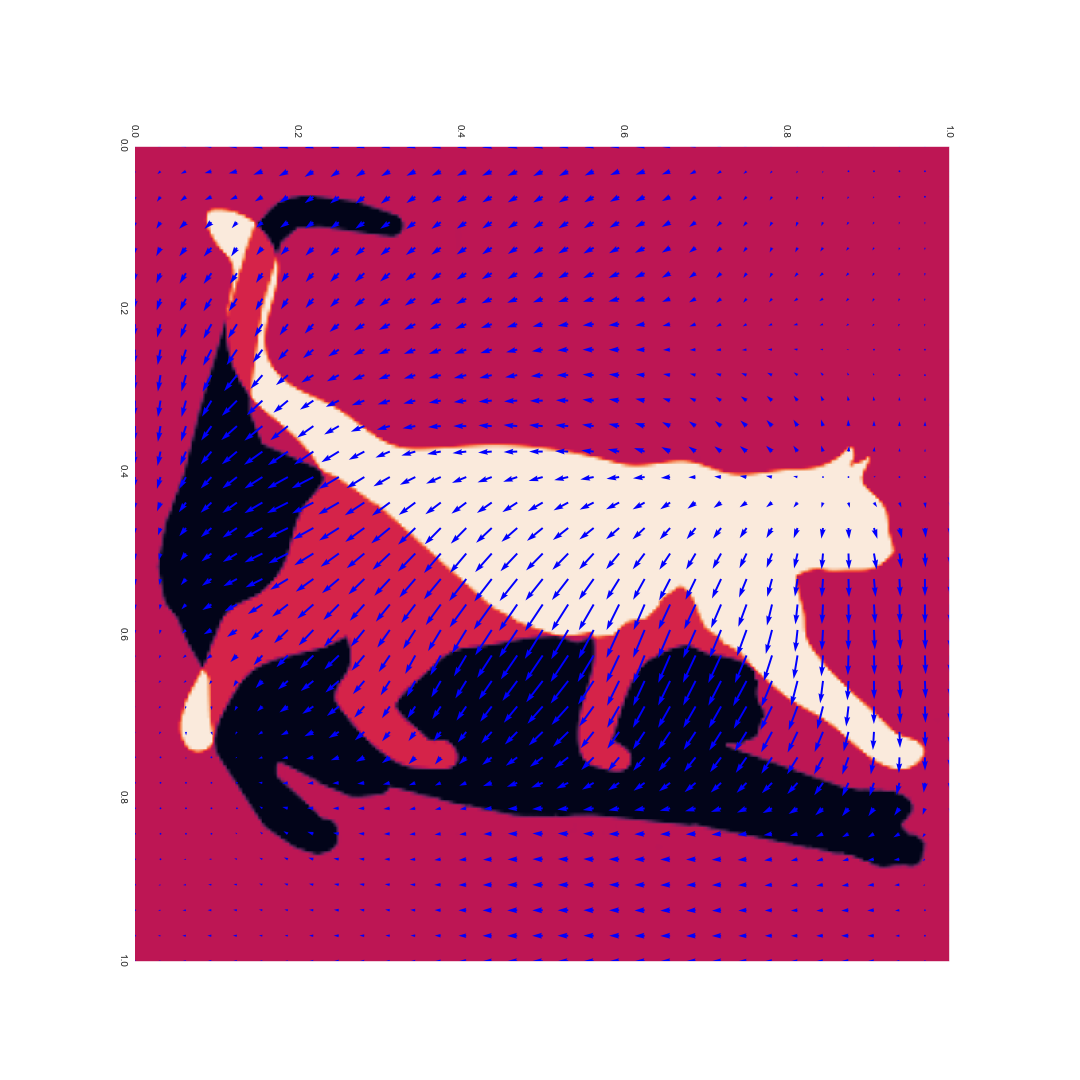

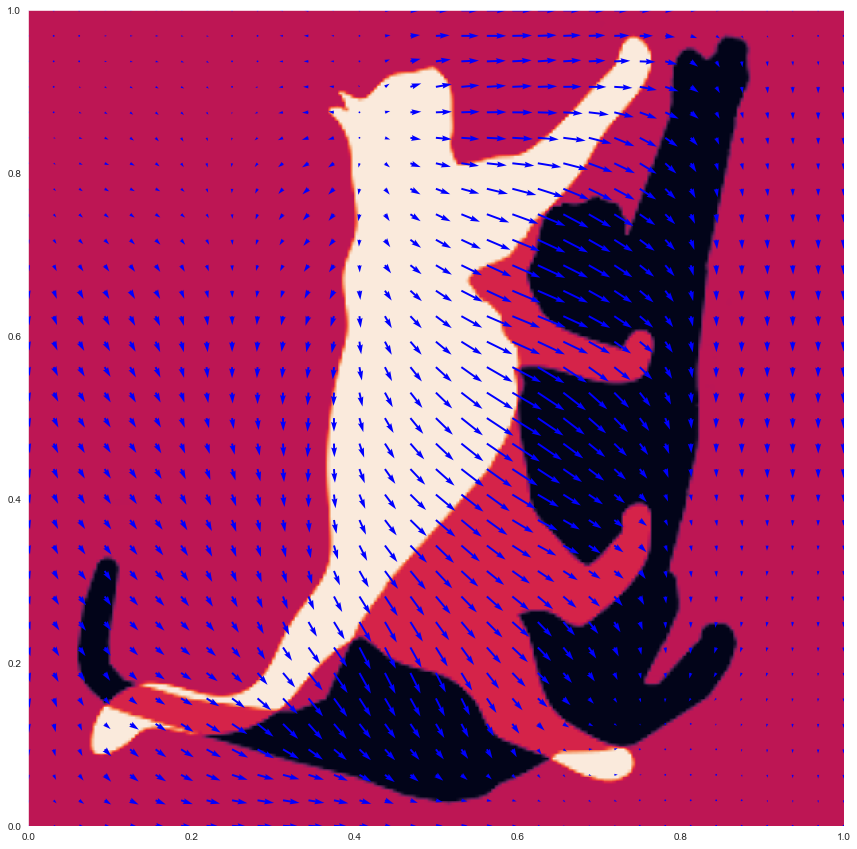

In [29]:
rho = rho0-rho1
PlotFlow(x, y, m, rho, scale=50)

**Comments** : this last algorithm gives pretty satisfying results, especially as it runs on a $1024\times 1024$ grid image and can run without needing a GPU, however it requires a bit more computational time with respec to the classical EMD $L_1$ and EMD $L_2$. The main advantage of this approach is that it gives more flexibility on the hyperparameter tuning (the number of levels $L$ has to be tuned), and it can deal with larger grids of discrete probability measures (in our case, images, but the approach can be easily adapted).

## References

**[0]**  Li, Ryu, Osher, Yin, and Gangbo : *A Parallel Method for Earth Mover's Distance*  
**[1]** Marco Cuturi : *Sinkhorn Distances: Lightspeed Computation of Optimal Transport*  
**[2]** Gabriel Peyré : *Computational Optimal Transport*  
**[3]** Mathieu Serrurier, Franck Mamalet, Alberto González-Sanz, Thibaut Boissin, Jean-Michel Loubes, Eustasio del Barrio : *Achieving robustness in classification using optimal transport with hinge regularization*  
**[4]** Longjie Li, Min Ma, Peng Lei, Xiaoping Wang, Xiaoyun Chen : *A Linear Approximate Algorithm for Earth Mover's Distance with Thresholded Ground Distance*, 2014  
**[5]** Sameer Shirdhonkar and David W. Jacobs : *Approximate earth mover's distance in linear time*  
**[6]** Jialin Liu, Wotao Yin, Wuchen Li, Yat Tin Chow : *Multilevel Optimal Transport: a Fast Approximation of Wasserstein-1 distances*  
**[7]** A.N Tolstoï : *Methods of Finding the Minimal Kilometrage in Cargo-transportation in space*  
**[8]** Martin Arjovsky, Soumith Chintala, Léon Bottou : *Wasserstein GAN*  
**[9]** Jun-Yan Zhu, Taesung Park, Phillip Isola, and Alexei A. Efros : *Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks*